# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import dataset

In [2]:
data = pd.read_csv('new1_churn_data.csv')

In [3]:
data.columns.values

array(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'], dtype=object)

In [4]:
user_identifier = data['user']

In [5]:
data = data.drop(columns= ['user'])

In [6]:
data = pd.get_dummies(data)

In [7]:
data.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [8]:
data = data.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [9]:
X = data.drop(columns=['churn'])
y = data['churn']

# Splitting the dataset 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21596, 41), (5400, 41), (21596,), (5400,))

# Balancing the training set

In [12]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [13]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [14]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index

In [15]:
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)

In [16]:
higher.shape, lower.shape

((8940,), (8940,))

In [17]:
new_index = np.concatenate((lower, higher))

In [18]:
X_train = X_train.loc[new_index,]
X_train 

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,26.0,0,0,2,0,0,10,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19766,28.0,0,0,0,0,0,118,1,0,1,...,0,0,0,0,1,0,0,0,0,0
8354,35.0,0,0,0,0,0,266,0,0,5,...,0,0,0,0,0,0,0,0,0,1
17883,38.0,0,0,28,0,0,74,0,0,8,...,0,0,0,0,0,0,0,0,1,0
25149,24.0,1,0,22,1,0,39,0,0,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9623,19.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
23475,31.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20631,19.0,2,0,4,2,0,6,0,0,2,...,0,0,0,0,1,0,0,0,0,0
5919,40.0,22,0,44,22,0,106,0,0,4,...,0,0,0,0,0,1,0,0,0,0


In [19]:
y_train = y_train[new_index]
y_train

11695    1
19766    1
8354     1
17883    1
25149    1
        ..
9623     0
23475    0
20631    0
5919     0
21824    0
Name: churn, Length: 17880, dtype: int64

# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# Fitting the model 

In [21]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state=0, solver='lbfgs')
Classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting the results

In [22]:
y_pred = Classifier.predict(X_test)

# Evaluating the results

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
con_matx = confusion_matrix(y_test, y_pred) 

In [25]:
con_matx

array([[1649, 1517],
       [ 565, 1669]], dtype=int64)

In [26]:
class_repo = classification_report(y_test, y_pred)

In [27]:
print(class_repo)

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3166
           1       0.52      0.75      0.62      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



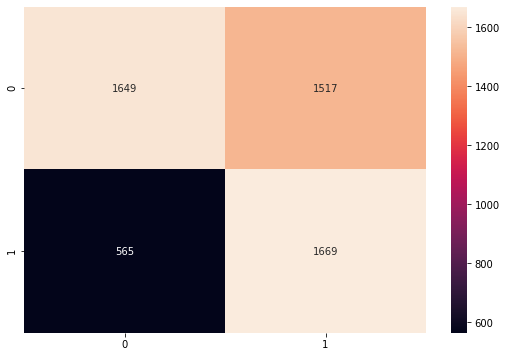

In [28]:
plt.figure(figsize=[9,6])
sns.heatmap(con_matx, annot= True, fmt='g')
plt.show()

# Applying k-fold Cross validation

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
accuracies = cross_val_score(estimator= Classifier, X= X_train, y = y_train, cv= 10)

In [31]:
accuracies.mean(), accuracies.std()

(0.6445190156599552, 0.009129188994514877)

# Analysing the coeffcients

In [32]:
pd.concat([pd.DataFrame(X_train.columns, columns=['feature']), 
          pd.DataFrame(np.transpose(Classifier.coef_), columns=['coefficient'])], axis= 1    
          )

,feature,coefficient
0,age,-0.164990
1,deposits,0.332579
2,withdrawal,0.067146
3,purchases_partners,-0.736299
4,purchases,-0.476647
5,cc_taken,0.076717
6,cc_recommended,0.057585
7,cc_disliked,-0.008387
8,cc_liked,-0.011071
9,cc_application_begin,0.058527


# Feature selection 

In [33]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs')
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

In [34]:
rfe.support_  #The columns which results true are going to be included in the model

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False])

In [35]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'cc_application_begin', 'web_user',
       'ios_user', 'registered_phones', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'left_for_two_month_plus', 'left_for_one_month',
       'reward_rate', 'housing_R', 'payment_type_Weekly',
       'zodiac_sign_Capricorn'],
      dtype='object')

In [36]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 18, 16,  1, 21,  1,  1, 20,  1, 15,  1,
        1,  1,  1,  1,  1, 14,  2,  1,  7,  8,  9,  1,  5, 11, 10,  1,  6,
       17,  3, 19, 22,  4, 12, 13])

In [37]:
pd.concat([pd.DataFrame(X_train.columns, columns=['feature']), 
          pd.DataFrame(np.transpose(rfe.ranking_), columns=['ranking'])], axis= 1    
          )

,feature,ranking
0,age,1
1,deposits,1
2,withdrawal,1
3,purchases_partners,1
4,purchases,1
5,cc_taken,1
6,cc_recommended,1
7,cc_disliked,18
8,cc_liked,16
9,cc_application_begin,1


In [38]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(random_state=0, solver='lbfgs')
Classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred = Classifier.predict(X_test[X_train.columns[rfe.support_]])

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
con_matx1 = confusion_matrix(y_test, y_pred) 
class_repo1 = classification_report(y_test, y_pred)
con_matx1, print(class_repo1)

              precision    recall  f1-score   support

           0       0.74      0.51      0.61      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



(array([[1626, 1540],
        [ 572, 1662]], dtype=int64), None)

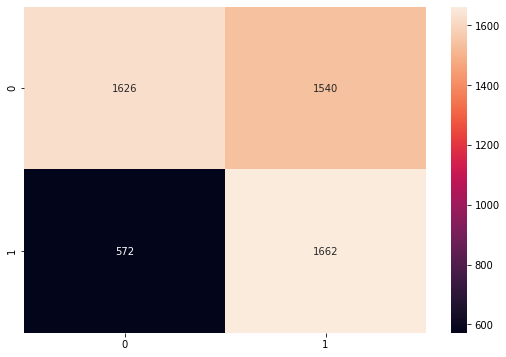

In [41]:
plt.figure(figsize=[9,6])
sns.heatmap(con_matx1, annot= True, fmt='g')
plt.show()

In [42]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns=['feature']), 
          pd.DataFrame(np.transpose(Classifier.coef_), columns=['coefficient'])], axis= 1    
          )

,feature,coefficient
0,age,-0.165464
1,deposits,0.332581
2,withdrawal,0.068196
3,purchases_partners,-0.727423
4,purchases,-0.478077
5,cc_taken,0.071935
6,cc_recommended,0.057746
7,cc_application_begin,0.057225
8,web_user,0.120261
9,ios_user,0.070418


#    Final results

In [43]:
final_results = pd.concat([user_identifier, y_test], axis= 1).dropna()
final_results['predicted_churn']= y_pred

In [44]:
final_results.reset_index(drop=True)

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,0
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
